In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
!pip install shap
import shap
shap.initjs()
!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
!pip install optuna
import optuna
path= "/content/drive/MyDrive/train.csv"
data=pd.read_csv(path, header=0)
print(len(data))
data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
#Get Features
y= data['SalePrice']
x= data[["LotArea","OverallQual", "OverallCond", "YearBuilt","TotRmsAbvGrd","GarageArea"]]
#Split the data using the scikit-learn library and having a train test split with validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y,  test_size=0.2, random_state=0)
x_train.shape, x_val.shape, y_train.shape, y_val.shape
# make a new regressor model 
regressor = xgb.XGBRegressor(objective ='reg:squarederror', 
                 colsample_bytree = 1, 
                 eta=0.3, 
                 learning_rate = 0.01,
                 max_depth = 5, 
                 alpha = 10, 
                 n_estimators = 500)
# fit on training set
regressor.fit(x_train, y_train) 
# predict on validation set
y_pred = regressor.predict(x_val)
# calculate Root Mean Square Error
from sklearn.metrics import mean_squared_error
root_mean_squared_error = mean_squared_error(y_val, y_pred, squared=False)
root_mean_squared_error

38378.44068863984

In [19]:
def objective(n_trials):
  params = {
        "n_estimators": n_trials.suggest_int("n_estimators", 100, 2000, step=100),
        "learning_rate": n_trials.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        "max_depth": n_trials.suggest_int("max_depth", 3, 15),
        "n_iter_no_change": 50,
    }
  dtrain = xgb.DMatrix(data = x_train, label = y_train)
  dval = xgb.DMatrix(data = x_val, label = y_val)

  regressor = xgb.train(params, dtrain) 
  y_pred = regressor.predict(dval)
  rmse = mean_squared_error(y_val, y_pred, squared=False)

  return rmse

In [20]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print(f"Optimized RMSE: {study.best_value:.4f}")
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

[I 2023-04-16 20:17:28,408] A new study created in memory with name: no-name-cb8d0eec-258c-4cb6-9f89-ffd9e01eca92
[I 2023-04-16 20:17:28,527] Trial 0 finished with value: 198943.67897469082 and parameters: {'n_estimators': 1400, 'learning_rate': 0.0002969536549477393, 'max_depth': 13}. Best is trial 0 with value: 198943.67897469082.
[I 2023-04-16 20:17:28,570] Trial 1 finished with value: 87823.91199760552 and parameters: {'n_estimators': 1200, 'learning_rate': 0.09138823223413792, 'max_depth': 4}. Best is trial 1 with value: 87823.91199760552.


[20:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:28,684] Trial 2 finished with value: 177231.76870751628 and parameters: {'n_estimators': 1200, 'learning_rate': 0.01259678878419975, 'max_depth': 8}. Best is trial 1 with value: 87823.91199760552.
[I 2023-04-16 20:17:28,739] Trial 3 finished with value: 42147.24927997999 and parameters: {'n_estimators': 800, 'learning_rate': 0.24046670912332685, 'max_depth': 4}. Best is trial 3 with value: 42147.24927997999.


[20:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:29,973] Trial 4 finished with value: 198493.0708843229 and parameters: {'n_estimators': 1200, 'learning_rate': 0.0005410500825128317, 'max_depth': 3}. Best is trial 3 with value: 42147.24927997999.


[20:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:30,663] Trial 5 finished with value: 49559.493249812585 and parameters: {'n_estimators': 1200, 'learning_rate': 0.18210251533385016, 'max_depth': 6}. Best is trial 3 with value: 42147.24927997999.


[20:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:32,019] Trial 6 finished with value: 198879.7879462171 and parameters: {'n_estimators': 1800, 'learning_rate': 0.00033101350644419584, 'max_depth': 13}. Best is trial 3 with value: 42147.24927997999.
[I 2023-04-16 20:17:32,072] Trial 7 finished with value: 185630.34572294302 and parameters: {'n_estimators': 1800, 'learning_rate': 0.007656543333687949, 'max_depth': 5}. Best is trial 3 with value: 42147.24927997999.
[I 2023-04-16 20:17:32,100] Trial 8 finished with value: 138217.74848183122 and parameters: {'n_estimators': 800, 'learning_rate': 0.03911088640019661, 'max_depth': 11}. Best is trial 3 with value: 42147.24927997999.
[I 2023-04-16 20:17:32,133] Trial 9 finished with value: 56500.93051100445 and parameters: {'n_estimators': 1200, 'learning_rate': 0.1607446226455004, 'max_depth': 14}. Best is trial 3 with value: 42147.24927997999.
[I 2023-04-16 20:17:32,179] Trial 10 finished with value: 196252.2173120141 and parameters: {'n_estimators': 100, 'learning_rate'

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:32,271] Trial 12 finished with value: 39080.890279334846 and parameters: {'n_estimators': 600, 'learning_rate': 0.2924325870565413, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,315] Trial 13 finished with value: 124981.45939804337 and parameters: {'n_estimators': 300, 'learning_rate': 0.05014108192467709, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,379] Trial 14 finished with value: 40647.64471933146 and parameters: {'n_estimators': 600, 'learning_rate': 0.27073421663111485, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,418] Trial 15 finished with value: 154783.81009606415 and parameters: {'n_estimators': 500, 'learning_rate': 0.02695342119948647, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.


[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:32,465] Trial 16 finished with value: 88593.48551046038 and parameters: {'n_estimators': 800, 'learning_rate': 0.0897273673630594, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,507] Trial 17 finished with value: 163495.25839386645 and parameters: {'n_estimators': 400, 'learning_rate': 0.021134138561122097, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,543] Trial 18 finished with value: 193444.76088433893 and parameters: {'n_estimators': 200, 'learning_rate': 0.003289646897805105, 'max_depth': 3}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,581] Trial 19 finished with value: 95467.86785435419 and parameters: {'n_estimators': 600, 'learning_rate': 0.08100347365643226, 'max_depth': 5}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,633] Trial 20 finished with value: 39341.808840741745 and parameters: {'n_estimators': 900, 'learning

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:32,700] Trial 21 finished with value: 64892.96451367521 and parameters: {'n_estimators': 900, 'learning_rate': 0.1321420817394568, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,756] Trial 22 finished with value: 39919.5408794358 and parameters: {'n_estimators': 1000, 'learning_rate': 0.29521950555952836, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,800] Trial 23 finished with value: 115547.2678866634 and parameters: {'n_estimators': 1000, 'learning_rate': 0.058728722298502095, 'max_depth': 12}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,848] Trial 24 finished with value: 67960.41607408407 and parameters: {'n_estimators': 1600, 'learning_rate': 0.12444622149728175, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:32,917] Trial 25 finished with value: 43430.380632926775 and parameters: {'n_estimators': 1000, 'learni

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:32,965] Trial 26 finished with value: 121996.83901761193 and parameters: {'n_estimators': 1500, 'learning_rate': 0.0526641017076236, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,014] Trial 27 finished with value: 61219.73793105805 and parameters: {'n_estimators': 700, 'learning_rate': 0.14090389484291524, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,057] Trial 28 finished with value: 149726.3802269489 and parameters: {'n_estimators': 400, 'learning_rate': 0.03058627767968753, 'max_depth': 12}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,106] Trial 29 finished with value: 86456.16858119742 and parameters: {'n_estimators': 1400, 'learning_rate': 0.09258860287609523, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.


[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:33,159] Trial 30 finished with value: 54274.71256708668 and parameters: {'n_estimators': 2000, 'learning_rate': 0.16460632531808025, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,208] Trial 31 finished with value: 41039.826367942645 and parameters: {'n_estimators': 600, 'learning_rate': 0.2531591453647617, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,263] Trial 32 finished with value: 42486.20400760423 and parameters: {'n_estimators': 900, 'learning_rate': 0.2372859852477389, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,303] Trial 33 finished with value: 95962.84480675156 and parameters: {'n_estimators': 1100, 'learning_rate': 0.08028301419096882, 'max_depth': 5}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,348] Trial 34 finished with value: 67039.28448082336 and parameters: {'n_estimators': 900, 'learning_ra

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:33,403] Trial 35 finished with value: 39907.27072015415 and parameters: {'n_estimators': 700, 'learning_rate': 0.24725978757199804, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,461] Trial 36 finished with value: 50916.22828762896 and parameters: {'n_estimators': 700, 'learning_rate': 0.181933323966489, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,505] Trial 37 finished with value: 172977.0187411539 and parameters: {'n_estimators': 1300, 'learning_rate': 0.015175344549002946, 'max_depth': 13}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,551] Trial 38 finished with value: 105428.53924610029 and parameters: {'n_estimators': 1100, 'learning_rate': 0.0692652361532205, 'max_depth': 12}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,598] Trial 39 finished with value: 49028.207638503605 and parameters: {'n_estimators': 700, 'learning_

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:33,654] Trial 40 finished with value: 73624.00487657385 and parameters: {'n_estimators': 400, 'learning_rate': 0.11227136968954649, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,704] Trial 41 finished with value: 39494.06679348176 and parameters: {'n_estimators': 500, 'learning_rate': 0.281847659231474, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,765] Trial 42 finished with value: 48694.76886515337 and parameters: {'n_estimators': 500, 'learning_rate': 0.19537469360141685, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,822] Trial 43 finished with value: 41540.73907240643 and parameters: {'n_estimators': 900, 'learning_rate': 0.28974323644544114, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,874] Trial 44 finished with value: 49174.76346723035 and parameters: {'n_estimators': 800, 'learning_rate':

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:33,926] Trial 45 finished with value: 71317.6229241771 and parameters: {'n_estimators': 500, 'learning_rate': 0.11748874875785861, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:33,980] Trial 46 finished with value: 41837.484157493025 and parameters: {'n_estimators': 300, 'learning_rate': 0.2984741515727143, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,026] Trial 47 finished with value: 134882.30540004894 and parameters: {'n_estimators': 700, 'learning_rate': 0.041760362479718066, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,069] Trial 48 finished with value: 50214.062413404 and parameters: {'n_estimators': 1000, 'learning_rate': 0.1782669517290495, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.


[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:34,121] Trial 49 finished with value: 109708.74121365364 and parameters: {'n_estimators': 200, 'learning_rate': 0.06509861284586331, 'max_depth': 4}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,169] Trial 50 finished with value: 83247.89225930415 and parameters: {'n_estimators': 1100, 'learning_rate': 0.09723478858875335, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,209] Trial 51 finished with value: 40521.00520293694 and parameters: {'n_estimators': 600, 'learning_rate': 0.2876915817061607, 'max_depth': 5}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,254] Trial 52 finished with value: 44249.267508307355 and parameters: {'n_estimators': 800, 'learning_rate': 0.21675361321337694, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,300] Trial 53 finished with value: 57522.67092444571 and parameters: {'n_estimators': 500, 'learning_r

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:34,393] Trial 55 finished with value: 79438.83647667873 and parameters: {'n_estimators': 800, 'learning_rate': 0.10282962553184158, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,440] Trial 56 finished with value: 59984.13124101304 and parameters: {'n_estimators': 700, 'learning_rate': 0.1438544889477077, 'max_depth': 5}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,500] Trial 57 finished with value: 39840.47019026054 and parameters: {'n_estimators': 300, 'learning_rate': 0.2941008466848309, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,552] Trial 58 finished with value: 42886.483879145475 and parameters: {'n_estimators': 300, 'learning_rate': 0.22812814020884148, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.


[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:34,610] Trial 59 finished with value: 59178.495417870705 and parameters: {'n_estimators': 100, 'learning_rate': 0.148940179234625, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,665] Trial 60 finished with value: 39328.648203813704 and parameters: {'n_estimators': 200, 'learning_rate': 0.2956894994347374, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,723] Trial 61 finished with value: 39583.09714604055 and parameters: {'n_estimators': 200, 'learning_rate': 0.29385023979462443, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.


[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:34,789] Trial 62 finished with value: 45477.447492611354 and parameters: {'n_estimators': 200, 'learning_rate': 0.215065047000271, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,846] Trial 63 finished with value: 54772.90137452703 and parameters: {'n_estimators': 400, 'learning_rate': 0.16370854159821618, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,897] Trial 64 finished with value: 42271.45285809915 and parameters: {'n_estimators': 200, 'learning_rate': 0.2318998798575922, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,944] Trial 65 finished with value: 101330.0572582894 and parameters: {'n_estimators': 100, 'learning_rate': 0.07366228537813713, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:34,989] Trial 66 finished with value: 74660.68042223246 and parameters: {'n_estimators': 300, 'learning_rate

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:35,052] Trial 67 finished with value: 40879.799006400695 and parameters: {'n_estimators': 400, 'learning_rate': 0.2880702629170375, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,103] Trial 68 finished with value: 61235.61099207634 and parameters: {'n_estimators': 200, 'learning_rate': 0.14429665218993984, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,162] Trial 69 finished with value: 44808.91293288233 and parameters: {'n_estimators': 300, 'learning_rate': 0.2204583559103831, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,208] Trial 70 finished with value: 86915.73526588223 and parameters: {'n_estimators': 500, 'learning_rate': 0.09200233326508195, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.


[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:35,273] Trial 71 finished with value: 40439.40798132122 and parameters: {'n_estimators': 100, 'learning_rate': 0.28776693376031565, 'max_depth': 12}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,334] Trial 72 finished with value: 51290.664950282844 and parameters: {'n_estimators': 300, 'learning_rate': 0.17986076090825026, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,392] Trial 73 finished with value: 42015.60790350888 and parameters: {'n_estimators': 400, 'learning_rate': 0.23313981952697407, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,440] Trial 74 finished with value: 66151.14380308305 and parameters: {'n_estimators': 1000, 'learning_rate': 0.12967547098381196, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.


[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:35,506] Trial 75 finished with value: 41197.482114896244 and parameters: {'n_estimators': 1200, 'learning_rate': 0.24949919668650344, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,557] Trial 76 finished with value: 51868.146515381 and parameters: {'n_estimators': 500, 'learning_rate': 0.17449136214118455, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,618] Trial 77 finished with value: 41200.60769848813 and parameters: {'n_estimators': 800, 'learning_rate': 0.29170163207126615, 'max_depth': 12}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,669] Trial 78 finished with value: 67029.459760648 and parameters: {'n_estimators': 900, 'learning_rate': 0.12770471548477152, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.


[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:35,726] Trial 79 finished with value: 50337.77620083129 and parameters: {'n_estimators': 700, 'learning_rate': 0.18893376757649322, 'max_depth': 10}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,805] Trial 80 finished with value: 42066.23758512917 and parameters: {'n_estimators': 1300, 'learning_rate': 0.24409361876912325, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,850] Trial 81 finished with value: 55948.69650244657 and parameters: {'n_estimators': 600, 'learning_rate': 0.1616163711303803, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,891] Trial 82 finished with value: 41268.02810813567 and parameters: {'n_estimators': 600, 'learning_rate': 0.24297717806039892, 'max_depth': 5}. Best is trial 12 with value: 39080.890279334846.


[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:35,948] Trial 83 finished with value: 39449.53913077416 and parameters: {'n_estimators': 200, 'learning_rate': 0.290323157653214, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:35,994] Trial 84 finished with value: 41093.1468671608 and parameters: {'n_estimators': 100, 'learning_rate': 0.2923085754662649, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,069] Trial 85 finished with value: 45544.99145637636 and parameters: {'n_estimators': 200, 'learning_rate': 0.20972978985430676, 'max_depth': 11}. Best is trial 12 with value: 39080.890279334846.


[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:36,146] Trial 86 finished with value: 70947.62280909791 and parameters: {'n_estimators': 200, 'learning_rate': 0.11831126459699517, 'max_depth': 13}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,191] Trial 87 finished with value: 46791.47407023258 and parameters: {'n_estimators': 300, 'learning_rate': 0.20087377907771276, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,233] Trial 88 finished with value: 89407.51350614139 and parameters: {'n_estimators': 400, 'learning_rate': 0.08915334208438767, 'max_depth': 4}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,286] Trial 89 finished with value: 41999.23363126114 and parameters: {'n_estimators': 100, 'learning_rate': 0.2990791489881827, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,336] Trial 90 finished with value: 58484.55236994875 and parameters: {'n_estimators': 1000, 'learning_rat

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:36,389] Trial 91 finished with value: 42045.07679976165 and parameters: {'n_estimators': 600, 'learning_rate': 0.2354165038737716, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,438] Trial 92 finished with value: 50335.27098300319 and parameters: {'n_estimators': 500, 'learning_rate': 0.18158656033741288, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,483] Trial 93 finished with value: 39489.34948682898 and parameters: {'n_estimators': 700, 'learning_rate': 0.25631141652595696, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,536] Trial 94 finished with value: 40905.51536555017 and parameters: {'n_estimators': 700, 'learning_rate': 0.25253359453403723, 'max_depth': 5}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,585] Trial 95 finished with value: 47380.07707641544 and parameters: {'n_estimators': 200, 'learning_rate'

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:36,643] Trial 96 finished with value: 54149.26469321809 and parameters: {'n_estimators': 800, 'learning_rate': 0.16270131863304085, 'max_depth': 8}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,697] Trial 97 finished with value: 63309.79632797573 and parameters: {'n_estimators': 900, 'learning_rate': 0.1349367071542065, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,761] Trial 98 finished with value: 40188.801397585616 and parameters: {'n_estimators': 1100, 'learning_rate': 0.24741233763952436, 'max_depth': 9}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,823] Trial 99 finished with value: 46699.911221207854 and parameters: {'n_estimators': 300, 'learning_rate': 0.20149202714432052, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.


[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:36,890] Trial 100 finished with value: 41089.94850353121 and parameters: {'n_estimators': 400, 'learning_rate': 0.25041970994073787, 'max_depth': 14}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,941] Trial 101 finished with value: 40948.16804867185 and parameters: {'n_estimators': 700, 'learning_rate': 0.2991379487121858, 'max_depth': 6}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:36,988] Trial 102 finished with value: 46807.170489973876 and parameters: {'n_estimators': 600, 'learning_rate': 0.20664949458701748, 'max_depth': 7}. Best is trial 12 with value: 39080.890279334846.
[I 2023-04-16 20:17:37,033] Trial 103 finished with value: 38820.55017191217 and parameters: {'n_estimators': 700, 'learning_rate': 0.25902108628804354, 'max_depth': 6}. Best is trial 103 with value: 38820.55017191217.
[I 2023-04-16 20:17:37,088] Trial 104 finished with value: 53632.07956906222 and parameters: {'n_estimators': 800, 'learnin

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:37,139] Trial 105 finished with value: 39944.70388645487 and parameters: {'n_estimators': 900, 'learning_rate': 0.2504691317857929, 'max_depth': 5}. Best is trial 103 with value: 38820.55017191217.
[I 2023-04-16 20:17:37,192] Trial 106 finished with value: 78799.53475960283 and parameters: {'n_estimators': 500, 'learning_rate': 0.10375919889469944, 'max_depth': 10}. Best is trial 103 with value: 38820.55017191217.
[I 2023-04-16 20:17:37,238] Trial 107 finished with value: 60879.33062385189 and parameters: {'n_estimators': 700, 'learning_rate': 0.1410765120333037, 'max_depth': 7}. Best is trial 103 with value: 38820.55017191217.
[I 2023-04-16 20:17:37,290] Trial 108 finished with value: 38496.604981305536 and parameters: {'n_estimators': 800, 'learning_rate': 0.26427467675051897, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,331] Trial 109 finished with value: 39983.09612386753 and parameters: {'n_estimators': 700, 'learnin

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:37,380] Trial 110 finished with value: 49054.85198752612 and parameters: {'n_estimators': 800, 'learning_rate': 0.18729571322791028, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,426] Trial 111 finished with value: 44615.09407498007 and parameters: {'n_estimators': 1000, 'learning_rate': 0.21197843737832905, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,474] Trial 112 finished with value: 40702.79238445114 and parameters: {'n_estimators': 900, 'learning_rate': 0.2992295299752574, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,522] Trial 113 finished with value: 38961.44587197785 and parameters: {'n_estimators': 700, 'learning_rate': 0.2583156408207672, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,573] Trial 114 finished with value: 40152.557082183324 and parameters: {'n_estimators': 700, 'lear

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:17:37,633] Trial 115 finished with value: 52090.72885848795 and parameters: {'n_estimators': 600, 'learning_rate': 0.16861318037336856, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,679] Trial 116 finished with value: 44490.242064242215 and parameters: {'n_estimators': 800, 'learning_rate': 0.21965195572434007, 'max_depth': 3}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,729] Trial 117 finished with value: 66050.31280348562 and parameters: {'n_estimators': 500, 'learning_rate': 0.12670494112802247, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,787] Trial 118 finished with value: 59998.66798682677 and parameters: {'n_estimators': 200, 'learning_rate': 0.14663514289134094, 'max_depth': 7}. Best is trial 108 with value: 38496.604981305536.



[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:37,860] Trial 119 finished with value: 40169.32538594041 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2617110175615475, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,928] Trial 120 finished with value: 50357.47042007403 and parameters: {'n_estimators': 800, 'learning_rate': 0.17872308853983848, 'max_depth': 8}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:37,987] Trial 121 finished with value: 45482.25235330388 and parameters: {'n_estimators': 900, 'learning_rate': 0.21891692533434756, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.


[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:38,036] Trial 122 finished with value: 40710.405508980875 and parameters: {'n_estimators': 700, 'learning_rate': 0.29782604210410213, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,096] Trial 123 finished with value: 39361.341451586086 and parameters: {'n_estimators': 100, 'learning_rate': 0.2636995746810408, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,149] Trial 124 finished with value: 43330.60465555111 and parameters: {'n_estimators': 100, 'learning_rate': 0.2250666980944701, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,201] Trial 125 finished with value: 39107.54256887916 and parameters: {'n_estimators': 200, 'learning_rate': 0.2608397410411993, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,257] Trial 126 finished with value: 48913.30108776771 and parameters: {'n_estimators': 200, 'learn

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:38,311] Trial 127 finished with value: 73097.06808127328 and parameters: {'n_estimators': 300, 'learning_rate': 0.11320119073065979, 'max_depth': 8}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,359] Trial 128 finished with value: 39446.16202041043 and parameters: {'n_estimators': 100, 'learning_rate': 0.2539380999090154, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,412] Trial 129 finished with value: 58101.81241862241 and parameters: {'n_estimators': 100, 'learning_rate': 0.15219367021745975, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,460] Trial 130 finished with value: 41318.480487682486 and parameters: {'n_estimators': 100, 'learning_rate': 0.24832002154669672, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.


[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:17:38,512] Trial 131 finished with value: 42498.72807074778 and parameters: {'n_estimators': 200, 'learning_rate': 0.29716898235201616, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,572] Trial 132 finished with value: 44876.034176107925 and parameters: {'n_estimators': 100, 'learning_rate': 0.21506567054574732, 'max_depth': 7}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,619] Trial 133 finished with value: 40352.70381374221 and parameters: {'n_estimators': 200, 'learning_rate': 0.2601730672863565, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,668] Trial 134 finished with value: 49620.43438794623 and parameters: {'n_estimators': 300, 'learning_rate': 0.18368827074968483, 'max_depth': 7}. Best is trial 108 with value: 38496.604981305536.



[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:38,729] Trial 135 finished with value: 42710.57785988656 and parameters: {'n_estimators': 100, 'learning_rate': 0.2993731397569816, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,782] Trial 136 finished with value: 43791.60600941583 and parameters: {'n_estimators': 1700, 'learning_rate': 0.22565967331472303, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,838] Trial 137 finished with value: 185050.76231311724 and parameters: {'n_estimators': 200, 'learning_rate': 0.007983483202576044, 'max_depth': 8}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:38,894] Trial 138 finished with value: 53176.69365645314 and parameters: {'n_estimators': 300, 'learning_rate': 0.17051705126151057, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.


[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:38,962] Trial 139 finished with value: 38849.409761372764 and parameters: {'n_estimators': 100, 'learning_rate': 0.2546634597534966, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,007] Trial 140 finished with value: 47574.976148383445 and parameters: {'n_estimators': 100, 'learning_rate': 0.19982648363245997, 'max_depth': 4}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,063] Trial 141 finished with value: 38963.934840236194 and parameters: {'n_estimators': 200, 'learning_rate': 0.2586018260074203, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,126] Trial 142 finished with value: 39951.55902432996 and parameters: {'n_estimators': 200, 'learning_rate': 0.2512014357843843, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.


[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:39,186] Trial 143 finished with value: 39201.88497040135 and parameters: {'n_estimators': 100, 'learning_rate': 0.26051336144258097, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,243] Trial 144 finished with value: 45260.187814814766 and parameters: {'n_estimators': 100, 'learning_rate': 0.21047265904744183, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,300] Trial 145 finished with value: 160248.13264697525 and parameters: {'n_estimators': 100, 'learning_rate': 0.023302408230722584, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,351] Trial 146 finished with value: 124790.55101633571 and parameters: {'n_estimators': 200, 'learning_rate': 0.05033663140379654, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.


[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:39,412] Trial 147 finished with value: 39041.248817038206 and parameters: {'n_estimators': 100, 'learning_rate': 0.2574329068799658, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,470] Trial 148 finished with value: 56807.07039397066 and parameters: {'n_estimators': 100, 'learning_rate': 0.15962563635943375, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,528] Trial 149 finished with value: 39798.59766112854 and parameters: {'n_estimators': 100, 'learning_rate': 0.24988915856517532, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.


[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:39,599] Trial 150 finished with value: 63232.51063953214 and parameters: {'n_estimators': 100, 'learning_rate': 0.13514635436305458, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,658] Trial 151 finished with value: 40244.41841480396 and parameters: {'n_estimators': 200, 'learning_rate': 0.26141305966762857, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,712] Trial 152 finished with value: 47794.81749735232 and parameters: {'n_estimators': 100, 'learning_rate': 0.19631573952379003, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,775] Trial 153 finished with value: 43491.334927996046 and parameters: {'n_estimators': 200, 'learning_rate': 0.2289138374183629, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,826] Trial 154 finished with value: 41995.50779461595 and parameters: {'n_estimators': 100, 'lea

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:39,872] Trial 155 finished with value: 50662.439025441614 and parameters: {'n_estimators': 200, 'learning_rate': 0.18066330746294806, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,946] Trial 156 finished with value: 41321.95467400611 and parameters: {'n_estimators': 600, 'learning_rate': 0.2482674957416437, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:39,995] Trial 157 finished with value: 146140.70007026166 and parameters: {'n_estimators': 800, 'learning_rate': 0.03321981375765517, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,047] Trial 158 finished with value: 45697.98733726409 and parameters: {'n_estimators': 300, 'learning_rate': 0.214165414973786, 'max_depth': 8}. Best is trial 108 with value: 38496.604981305536.


[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:40,099] Trial 159 finished with value: 40411.45057269907 and parameters: {'n_estimators': 700, 'learning_rate': 0.25873110675080185, 'max_depth': 5}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,153] Trial 160 finished with value: 109839.91320373303 and parameters: {'n_estimators': 200, 'learning_rate': 0.0644121439784623, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,212] Trial 161 finished with value: 39936.91495291141 and parameters: {'n_estimators': 100, 'learning_rate': 0.2665024287570348, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,277] Trial 162 finished with value: 44796.19768964945 and parameters: {'n_estimators': 200, 'learning_rate': 0.22193362712388148, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.


[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:40,339] Trial 163 finished with value: 50789.752963937244 and parameters: {'n_estimators': 600, 'learning_rate': 0.1843173154363475, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,394] Trial 164 finished with value: 40009.810582894876 and parameters: {'n_estimators': 200, 'learning_rate': 0.2904432402855049, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,466] Trial 165 finished with value: 43220.21487826459 and parameters: {'n_estimators': 100, 'learning_rate': 0.2992402217744419, 'max_depth': 11}. Best is trial 108 with value: 38496.604981305536.


[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:40,530] Trial 166 finished with value: 43706.985521430164 and parameters: {'n_estimators': 300, 'learning_rate': 0.225196961558913, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,593] Trial 167 finished with value: 57170.78078456128 and parameters: {'n_estimators': 700, 'learning_rate': 0.15540764612633345, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,664] Trial 168 finished with value: 47821.2646593011 and parameters: {'n_estimators': 200, 'learning_rate': 0.19614895334524932, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,722] Trial 169 finished with value: 40832.41301691631 and parameters: {'n_estimators': 100, 'learning_rate': 0.2498802345335422, 'max_depth': 7}. Best is trial 108 with value: 38496.604981305536.


[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:40,791] Trial 170 finished with value: 54881.15627423422 and parameters: {'n_estimators': 800, 'learning_rate': 0.16781697622454084, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,848] Trial 171 finished with value: 38654.196575147944 and parameters: {'n_estimators': 100, 'learning_rate': 0.2548420842192987, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,902] Trial 172 finished with value: 39917.70946648478 and parameters: {'n_estimators': 100, 'learning_rate': 0.25171793613926813, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:40,972] Trial 173 finished with value: 44955.91551663381 and parameters: {'n_estimators': 200, 'learning_rate': 0.21188820635933964, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.


[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:41,042] Trial 174 finished with value: 39107.79337454158 and parameters: {'n_estimators': 100, 'learning_rate': 0.26452651102449926, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,096] Trial 175 finished with value: 41999.362530512924 and parameters: {'n_estimators': 100, 'learning_rate': 0.29907469677636017, 'max_depth': 8}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,150] Trial 176 finished with value: 43250.84945675358 and parameters: {'n_estimators': 100, 'learning_rate': 0.22718027567611263, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,214] Trial 177 finished with value: 47427.28057458764 and parameters: {'n_estimators': 100, 'learning_rate': 0.19166878441279575, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,268] Trial 178 finished with value: 195035.42472705356 and parameters: {'n_estimators': 600, 'le

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:41,327] Trial 179 finished with value: 197669.55893189146 and parameters: {'n_estimators': 100, 'learning_rate': 0.0009783752254714651, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,389] Trial 180 finished with value: 130727.14362129995 and parameters: {'n_estimators': 700, 'learning_rate': 0.04516597276366771, 'max_depth': 6}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,449] Trial 181 finished with value: 39622.21698206594 and parameters: {'n_estimators': 200, 'learning_rate': 0.2583464365952619, 'max_depth': 10}. Best is trial 108 with value: 38496.604981305536.


[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:41,524] Trial 182 finished with value: 39110.03575957275 and parameters: {'n_estimators': 200, 'learning_rate': 0.26079916428457955, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,575] Trial 183 finished with value: 175708.82226014294 and parameters: {'n_estimators': 100, 'learning_rate': 0.013518206665748668, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,635] Trial 184 finished with value: 39055.51972786577 and parameters: {'n_estimators': 200, 'learning_rate': 0.25722825504286667, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,697] Trial 185 finished with value: 41770.15631828906 and parameters: {'n_estimators': 200, 'learning_rate': 0.2349308945979238, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,751] Trial 186 finished with value: 96168.92148251449 and parameters: {'n_estimators': 300, 'lea

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:41,810] Trial 187 finished with value: 46982.789327190505 and parameters: {'n_estimators': 200, 'learning_rate': 0.2051186439598286, 'max_depth': 8}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,871] Trial 188 finished with value: 38600.41415655861 and parameters: {'n_estimators': 100, 'learning_rate': 0.262725738665155, 'max_depth': 9}. Best is trial 108 with value: 38496.604981305536.
[I 2023-04-16 20:17:41,929] Trial 189 finished with value: 37633.06408026974 and parameters: {'n_estimators': 100, 'learning_rate': 0.2631629457241946, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:42,008] Trial 190 finished with value: 51680.92622670183 and parameters: {'n_estimators': 100, 'learning_rate': 0.17056613634639728, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:42,088] Trial 191 finished with value: 42428.02346623968 and parameters: {'n_estimators': 100, 'learning_rate': 0.29833162057257323, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:42,158] Trial 192 finished with value: 41082.813026031145 and parameters: {'n_estimators': 100, 'learning_rate': 0.2561869484643119, 'max_depth': 3}. Best is trial 189 with value: 37633.06408026974.


[20:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:42,283] Trial 193 finished with value: 44626.14554335176 and parameters: {'n_estimators': 200, 'learning_rate': 0.22317092069648276, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:42,929] Trial 194 finished with value: 39104.4757535831 and parameters: {'n_estimators': 100, 'learning_rate': 0.2610167263894733, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:43] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:43,572] Trial 195 finished with value: 169247.0194223342 and parameters: {'n_estimators': 100, 'learning_rate': 0.017506151373163463, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:43] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:45,294] Trial 196 finished with value: 45918.080856215245 and parameters: {'n_estimators': 100, 'learning_rate': 0.199783016379459, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:45,534] Trial 197 finished with value: 143110.95495500235 and parameters: {'n_estimators': 100, 'learning_rate': 0.03532553590632379, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:45,686] Trial 198 finished with value: 38911.570003784414 and parameters: {'n_estimators': 200, 'learning_rate': 0.25797346767030205, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:45,744] Trial 199 finished with value: 41975.028954257694 and parameters: {'n_estimators': 200, 'learning_rate': 0.23274684993741065, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:45,797] Trial 200 finished with value: 61677.053304489615 and parameters: {'n_estimators': 300, 'learning_rate': 0.1432845139440841, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:45,859] Trial 201 finished with value: 39500.70715118098 and parameters: {'n_estimators': 100, 'learning_rate': 0.25869017673738803, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:45,924] Trial 202 finished with value: 38797.15352394253 and parameters: {'n_estimators': 200, 'learning_rate': 0.2659984898467621, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:45,981] Trial 203 finished with value: 39469.43973586086 and parameters: {'n_estimators': 200, 'learning_rate': 0.2674340166164901, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:46,045] Trial 204 finished with value: 41994.26429496072 and parameters: {'n_estimators': 200, 'learning_rate': 0.2992741124705862, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,107] Trial 205 finished with value: 43943.77243451573 and parameters: {'n_estimators': 300, 'learning_rate': 0.21319091547299837, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,167] Trial 206 finished with value: 157280.55186731883 and parameters: {'n_estimators': 200, 'learning_rate': 0.025330770077878286, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,236] Trial 207 finished with value: 51141.84979391918 and parameters: {'n_estimators': 200, 'learning_rate': 0.1859509231766958, 'max_depth': 10}. Best is trial 189 with value: 37633.06408026974.


[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:46,302] Trial 208 finished with value: 43254.61516324554 and parameters: {'n_estimators': 100, 'learning_rate': 0.2271461150759613, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,364] Trial 209 finished with value: 40068.76186541486 and parameters: {'n_estimators': 100, 'learning_rate': 0.26152928404395925, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,434] Trial 210 finished with value: 42694.54578328854 and parameters: {'n_estimators': 200, 'learning_rate': 0.2993924911855828, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,495] Trial 211 finished with value: 40651.1041312931 and parameters: {'n_estimators': 100, 'learning_rate': 0.24050264446002367, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:46,557] Trial 212 finished with value: 114449.5067957649 and parameters: {'n_estimators': 100, 'learning_rate': 0.05992908224349568, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,613] Trial 213 finished with value: 191368.41891076136 and parameters: {'n_estimators': 100, 'learning_rate': 0.004416477626596088, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,663] Trial 214 finished with value: 199135.94223034175 and parameters: {'n_estimators': 200, 'learning_rate': 0.0001945255839989158, 'max_depth': 10}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,723] Trial 215 finished with value: 39220.97948821273 and parameters: {'n_estimators': 1900, 'learning_rate': 0.25717857428671, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,788] Trial 216 finished with value: 47068.2402641389 and parameters: {'n_estimators': 1500, 'lear

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:46,857] Trial 217 finished with value: 43467.727051890564 and parameters: {'n_estimators': 1300, 'learning_rate': 0.22995060219647812, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,919] Trial 218 finished with value: 39072.83751697544 and parameters: {'n_estimators': 1200, 'learning_rate': 0.2621102151800624, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:46,978] Trial 219 finished with value: 50799.77789299215 and parameters: {'n_estimators': 1200, 'learning_rate': 0.18718796662972964, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.


[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:47,034] Trial 220 finished with value: 184650.8378732131 and parameters: {'n_estimators': 1000, 'learning_rate': 0.00822315284436165, 'max_depth': 8}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:47,101] Trial 221 finished with value: 39078.853029116515 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2620077076797459, 'max_depth': 9}. Best is trial 189 with value: 37633.06408026974.
[I 2023-04-16 20:17:47,189] Trial 222 finished with value: 37591.26290793679 and parameters: {'n_estimators': 1900, 'learning_rate': 0.26335499333391776, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,249] Trial 223 finished with value: 39097.427514998046 and parameters: {'n_estimators': 1800, 'learning_rate': 0.264703153599739, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:47,315] Trial 224 finished with value: 40518.84431244421 and parameters: {'n_estimators': 1800, 'learning_rate': 0.25212193453372905, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,374] Trial 225 finished with value: 42713.79830996325 and parameters: {'n_estimators': 1700, 'learning_rate': 0.29969486786918964, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,439] Trial 226 finished with value: 45300.360441163386 and parameters: {'n_estimators': 2000, 'learning_rate': 0.21618968328127006, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:47,514] Trial 227 finished with value: 39148.89431728849 and parameters: {'n_estimators': 1900, 'learning_rate': 0.25607370423073067, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,574] Trial 228 finished with value: 51991.940908169796 and parameters: {'n_estimators': 1800, 'learning_rate': 0.16982996643183654, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,638] Trial 229 finished with value: 44869.53590628439 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2178817136156727, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,709] Trial 230 finished with value: 39303.13479622807 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2596752109814831, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:47,774] Trial 231 finished with value: 150919.59791840232 and parameters: {'n_estimators': 1900, 'learning_rate': 0.02977538474439465, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,849] Trial 232 finished with value: 38577.01437420992 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2537041754776736, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,911] Trial 233 finished with value: 42514.207802890596 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2275605775533244, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:47,970] Trial 234 finished with value: 42172.1514974547 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2987035257330816, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:48,037] Trial 235 finished with value: 48841.69638952905 and parameters: {'n_estimators': 2000, 'learning_rate': 0.1924555837912114, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,096] Trial 236 finished with value: 128968.11676119138 and parameters: {'n_estimators': 1900, 'learning_rate': 0.04677040648206524, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,154] Trial 237 finished with value: 39133.28249993186 and parameters: {'n_estimators': 1700, 'learning_rate': 0.2566509077327803, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,234] Trial 238 finished with value: 42110.54000730715 and parameters: {'n_estimators': 1900, 'learning_rate': 0.23329936679681368, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:48,296] Trial 239 finished with value: 138325.004895974 and parameters: {'n_estimators': 1800, 'learning_rate': 0.039031234734204445, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,360] Trial 240 finished with value: 50706.009535861835 and parameters: {'n_estimators': 1700, 'learning_rate': 0.18948759030871046, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,412] Trial 241 finished with value: 180337.554815579 and parameters: {'n_estimators': 1900, 'learning_rate': 0.01073818886134328, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,470] Trial 242 finished with value: 38975.453173210335 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2584268493404686, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:48,544] Trial 243 finished with value: 39402.439571571056 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2617462349584277, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,607] Trial 244 finished with value: 41752.81391281406 and parameters: {'n_estimators': 1900, 'learning_rate': 0.23510976934254388, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,674] Trial 245 finished with value: 169442.20444933575 and parameters: {'n_estimators': 1600, 'learning_rate': 0.017383172504275006, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,728] Trial 246 finished with value: 121601.93977343761 and parameters: {'n_estimators': 1700, 'learning_rate': 0.053014493406072706, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:48,798] Trial 247 finished with value: 42593.546423123254 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2976480743661574, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,862] Trial 248 finished with value: 45751.74464579747 and parameters: {'n_estimators': 1900, 'learning_rate': 0.21494951871343734, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,924] Trial 249 finished with value: 39041.03213253651 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2574361504234921, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:48,987] Trial 250 finished with value: 81832.49025663805 and parameters: {'n_estimators': 2000, 'learning_rate': 0.10016853107752545, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.


[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:49,053] Trial 251 finished with value: 40186.24391555508 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2649887483299557, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,113] Trial 252 finished with value: 44601.08124021763 and parameters: {'n_estimators': 1100, 'learning_rate': 0.2126443026674747, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,160] Trial 253 finished with value: 40119.10843672639 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2998527610876501, 'max_depth': 4}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,244] Trial 254 finished with value: 52136.89849666958 and parameters: {'n_estimators': 1400, 'learning_rate': 0.173351868005178, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:49,311] Trial 255 finished with value: 90655.01090308982 and parameters: {'n_estimators': 1800, 'learning_rate': 0.08665210816564416, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,370] Trial 256 finished with value: 41830.730492859206 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2347283301148063, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,429] Trial 257 finished with value: 46053.144528576304 and parameters: {'n_estimators': 1700, 'learning_rate': 0.202040945781668, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,487] Trial 258 finished with value: 39121.58841001792 and parameters: {'n_estimators': 1600, 'learning_rate': 0.26064788711148923, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:49,554] Trial 259 finished with value: 38300.063763739 and parameters: {'n_estimators': 1600, 'learning_rate': 0.2614672478070513, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,623] Trial 260 finished with value: 56484.70646694724 and parameters: {'n_estimators': 1500, 'learning_rate': 0.160439535117247, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,682] Trial 261 finished with value: 43737.790116297074 and parameters: {'n_estimators': 1600, 'learning_rate': 0.22074013096351477, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,740] Trial 262 finished with value: 41467.82153229156 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2997760957021886, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.


[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:49,812] Trial 263 finished with value: 48157.67126652329 and parameters: {'n_estimators': 200, 'learning_rate': 0.19624065590176537, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,871] Trial 264 finished with value: 40732.571008807725 and parameters: {'n_estimators': 1900, 'learning_rate': 0.24104287061559077, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,940] Trial 265 finished with value: 38696.159447375656 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2616683106497657, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:49,997] Trial 266 finished with value: 72511.11377205743 and parameters: {'n_estimators': 1900, 'learning_rate': 0.11417224917246328, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.


[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:50,069] Trial 267 finished with value: 42787.13201285495 and parameters: {'n_estimators': 1900, 'learning_rate': 0.29878301453749617, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,130] Trial 268 finished with value: 192049.73114987012 and parameters: {'n_estimators': 2000, 'learning_rate': 0.004039392028542517, 'max_depth': 15}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,191] Trial 269 finished with value: 45539.62870422405 and parameters: {'n_estimators': 1900, 'learning_rate': 0.21805352926620936, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,270] Trial 270 finished with value: 188573.33858221804 and parameters: {'n_estimators': 1400, 'learning_rate': 0.0059832551006671255, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.


[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:50,332] Trial 271 finished with value: 197995.99130059665 and parameters: {'n_estimators': 1800, 'learning_rate': 0.0008032883609653727, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,387] Trial 272 finished with value: 96820.09724316913 and parameters: {'n_estimators': 1800, 'learning_rate': 0.07867553415366284, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,456] Trial 273 finished with value: 50472.4324280162 and parameters: {'n_estimators': 1900, 'learning_rate': 0.18101933317454366, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,516] Trial 274 finished with value: 62085.84807180083 and parameters: {'n_estimators': 400, 'learning_rate': 0.13952919655488968, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:50,596] Trial 275 finished with value: 38976.602049907255 and parameters: {'n_estimators': 1300, 'learning_rate': 0.25838985732922465, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,652] Trial 276 finished with value: 156697.37084439053 and parameters: {'n_estimators': 1300, 'learning_rate': 0.0257280681203022, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,707] Trial 277 finished with value: 42619.77701667686 and parameters: {'n_estimators': 1200, 'learning_rate': 0.23677076810427414, 'max_depth': 5}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,769] Trial 278 finished with value: 46188.72132017419 and parameters: {'n_estimators': 1200, 'learning_rate': 0.2012010802839517, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:50,867] Trial 279 finished with value: 38931.61355450408 and parameters: {'n_estimators': 1100, 'learning_rate': 0.26235681617303674, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,932] Trial 280 finished with value: 42956.59203662629 and parameters: {'n_estimators': 1100, 'learning_rate': 0.29902174231113865, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:50,993] Trial 281 finished with value: 52129.2497561834 and parameters: {'n_estimators': 1100, 'learning_rate': 0.17319879942737706, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,050] Trial 282 finished with value: 118013.20183188206 and parameters: {'n_estimators': 2000, 'learning_rate': 0.05647201824249767, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.


[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:51,129] Trial 283 finished with value: 41994.47368522898 and parameters: {'n_estimators': 1100, 'learning_rate': 0.2329249756357463, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,188] Trial 284 finished with value: 46914.34494509866 and parameters: {'n_estimators': 1300, 'learning_rate': 0.205859967229031, 'max_depth': 7}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,262] Trial 285 finished with value: 40141.912533093775 and parameters: {'n_estimators': 1300, 'learning_rate': 0.25691455974871646, 'max_depth': 11}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,330] Trial 286 finished with value: 194788.6927236481 and parameters: {'n_estimators': 1100, 'learning_rate': 0.00253640014964996, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.


[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:51,399] Trial 287 finished with value: 40004.063933642545 and parameters: {'n_estimators': 1200, 'learning_rate': 0.2614636866017125, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,448] Trial 288 finished with value: 55682.73196881878 and parameters: {'n_estimators': 1000, 'learning_rate': 0.1581190878263581, 'max_depth': 4}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,508] Trial 289 finished with value: 43293.637011699124 and parameters: {'n_estimators': 1900, 'learning_rate': 0.22611279294033382, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,570] Trial 290 finished with value: 42166.36928543777 and parameters: {'n_estimators': 1200, 'learning_rate': 0.2988954197751415, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:51,647] Trial 291 finished with value: 46657.92616312257 and parameters: {'n_estimators': 900, 'learning_rate': 0.20207233008727088, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,708] Trial 292 finished with value: 39188.86896418513 and parameters: {'n_estimators': 1000, 'learning_rate': 0.25571187559897146, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,765] Trial 293 finished with value: 198821.12987381924 and parameters: {'n_estimators': 1800, 'learning_rate': 0.0003622933629987968, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,827] Trial 294 finished with value: 177878.17810587186 and parameters: {'n_estimators': 800, 'learning_rate': 0.01220916355142994, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:51,897] Trial 295 finished with value: 51118.67415819986 and parameters: {'n_estimators': 2000, 'learning_rate': 0.18538053062078486, 'max_depth': 11}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:51,951] Trial 296 finished with value: 135259.4827307967 and parameters: {'n_estimators': 1900, 'learning_rate': 0.0415167283421649, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,021] Trial 297 finished with value: 43436.06875746437 and parameters: {'n_estimators': 1200, 'learning_rate': 0.229504706723464, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,079] Trial 298 finished with value: 67093.66987036975 and parameters: {'n_estimators': 600, 'learning_rate': 0.12535311890790365, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:52,156] Trial 299 finished with value: 42170.41428122388 and parameters: {'n_estimators': 100, 'learning_rate': 0.29905049775626474, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,217] Trial 300 finished with value: 39123.217350658735 and parameters: {'n_estimators': 1900, 'learning_rate': 0.25679986713949854, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,282] Trial 301 finished with value: 44880.210741048904 and parameters: {'n_estimators': 1400, 'learning_rate': 0.20708341933061336, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,359] Trial 302 finished with value: 59796.19567357602 and parameters: {'n_estimators': 1500, 'learning_rate': 0.1476572301203122, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.


[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:52,428] Trial 303 finished with value: 42104.36490221916 and parameters: {'n_estimators': 700, 'learning_rate': 0.2326933112784734, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,495] Trial 304 finished with value: 51120.888983455276 and parameters: {'n_estimators': 1800, 'learning_rate': 0.1755269280038163, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,550] Trial 305 finished with value: 139397.50973992125 and parameters: {'n_estimators': 2000, 'learning_rate': 0.038337728807407295, 'max_depth': 5}. Best is trial 222 with value: 37591.26290793679.


[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:52,620] Trial 306 finished with value: 108749.08798300567 and parameters: {'n_estimators': 100, 'learning_rate': 0.06566743773513162, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,686] Trial 307 finished with value: 39508.39324272189 and parameters: {'n_estimators': 300, 'learning_rate': 0.26223429981074003, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,742] Trial 308 finished with value: 107462.71119467354 and parameters: {'n_estimators': 100, 'learning_rate': 0.06697702749200951, 'max_depth': 7}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,800] Trial 309 finished with value: 44298.07919693795 and parameters: {'n_estimators': 1300, 'learning_rate': 0.22145358286061906, 'max_depth': 3}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,858] Trial 310 finished with value: 199311.70685450317 and parameters: {'n_estimators': 1700, 'lea

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:52,928] Trial 311 finished with value: 40249.80781867514 and parameters: {'n_estimators': 600, 'learning_rate': 0.26181117181153707, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:52,988] Trial 312 finished with value: 197164.99338152134 and parameters: {'n_estimators': 1800, 'learning_rate': 0.0012495514479776634, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,048] Trial 313 finished with value: 48556.69454069699 and parameters: {'n_estimators': 1500, 'learning_rate': 0.19426394785760648, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:53,122] Trial 314 finished with value: 154268.52619993323 and parameters: {'n_estimators': 1900, 'learning_rate': 0.02735097093493295, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,180] Trial 315 finished with value: 183318.14290295963 and parameters: {'n_estimators': 200, 'learning_rate': 0.008979735862637223, 'max_depth': 7}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,236] Trial 316 finished with value: 189261.70391980227 and parameters: {'n_estimators': 500, 'learning_rate': 0.0055960792637263865, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,307] Trial 317 finished with value: 39583.32532834744 and parameters: {'n_estimators': 100, 'learning_rate': 0.2627933606470232, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.


[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:53,392] Trial 318 finished with value: 43078.9827754115 and parameters: {'n_estimators': 800, 'learning_rate': 0.2999812435604582, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,450] Trial 319 finished with value: 174732.96057334254 and parameters: {'n_estimators': 1600, 'learning_rate': 0.014102348138886521, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,514] Trial 320 finished with value: 43680.88725690632 and parameters: {'n_estimators': 2000, 'learning_rate': 0.22590043593590434, 'max_depth': 6}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,571] Trial 321 finished with value: 145396.1210857718 and parameters: {'n_estimators': 100, 'learning_rate': 0.03372288413245492, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.


[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:53,632] Trial 322 finished with value: 87781.38374953065 and parameters: {'n_estimators': 900, 'learning_rate': 0.09084960220761043, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,696] Trial 323 finished with value: 54248.50186063326 and parameters: {'n_estimators': 1100, 'learning_rate': 0.1695582423043835, 'max_depth': 8}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,763] Trial 324 finished with value: 47931.39319698086 and parameters: {'n_estimators': 1200, 'learning_rate': 0.19863254014282067, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,827] Trial 325 finished with value: 39091.41505044204 and parameters: {'n_estimators': 700, 'learning_rate': 0.2618524872522512, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.


[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:53,887] Trial 326 finished with value: 42487.11576293604 and parameters: {'n_estimators': 700, 'learning_rate': 0.23146867208672092, 'max_depth': 5}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:53,938] Trial 327 finished with value: 180835.03708694357 and parameters: {'n_estimators': 700, 'learning_rate': 0.010473767654577928, 'max_depth': 4}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:54,007] Trial 328 finished with value: 57814.26152961197 and parameters: {'n_estimators': 700, 'learning_rate': 0.15419680139807834, 'max_depth': 9}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:54,065] Trial 329 finished with value: 195982.71070174495 and parameters: {'n_estimators': 1900, 'learning_rate': 0.0018872290389946077, 'max_depth': 14}. Best is trial 222 with value: 37591.26290793679.


[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:54,139] Trial 330 finished with value: 43045.57865477164 and parameters: {'n_estimators': 800, 'learning_rate': 0.2994634228626886, 'max_depth': 10}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:54,209] Trial 331 finished with value: 43608.122622058036 and parameters: {'n_estimators': 600, 'learning_rate': 0.22813701505702352, 'max_depth': 11}. Best is trial 222 with value: 37591.26290793679.
[I 2023-04-16 20:17:54,273] Trial 332 finished with value: 37574.28472651776 and parameters: {'n_estimators': 700, 'learning_rate': 0.26364097356592897, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,344] Trial 333 finished with value: 99899.66105541211 and parameters: {'n_estimators': 700, 'learning_rate': 0.07526608792693482, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:54,429] Trial 334 finished with value: 48404.09216418666 and parameters: {'n_estimators': 700, 'learning_rate': 0.19541686532024163, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,499] Trial 335 finished with value: 38557.799085621264 and parameters: {'n_estimators': 800, 'learning_rate': 0.2539719794320131, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,560] Trial 336 finished with value: 170602.43178398526 and parameters: {'n_estimators': 800, 'learning_rate': 0.016649175754659604, 'max_depth': 12}. Best is trial 332 with value: 37574.28472651776.


[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:17:54,625] Trial 337 finished with value: 165911.36850972156 and parameters: {'n_estimators': 900, 'learning_rate': 0.019587512263850308, 'max_depth': 6}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,696] Trial 338 finished with value: 44891.9419311641 and parameters: {'n_estimators': 800, 'learning_rate': 0.21763070308411175, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,760] Trial 339 finished with value: 78824.1190584338 and parameters: {'n_estimators': 400, 'learning_rate': 0.10371359406681534, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.



[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:54,846] Trial 340 finished with value: 66814.05668001641 and parameters: {'n_estimators': 1000, 'learning_rate': 0.12849542860936944, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,912] Trial 341 finished with value: 50688.43457187709 and parameters: {'n_estimators': 800, 'learning_rate': 0.1816216479260366, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:54,981] Trial 342 finished with value: 39727.33952942417 and parameters: {'n_estimators': 300, 'learning_rate': 0.26599572614721495, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:55,064] Trial 343 finished with value: 43085.20684144136 and parameters: {'n_estimators': 200, 'learning_rate': 0.2997786475965734, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:55,133] Trial 344 finished with value: 43563.18888577349 and parameters: {'n_estimators': 2000, 'learning_rate': 0.22952848413827182, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:55,204] Trial 345 finished with value: 48925.90047471531 and parameters: {'n_estimators': 1400, 'learning_rate': 0.1964198295601318, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:55,290] Trial 346 finished with value: 41751.894575698665 and parameters: {'n_estimators': 900, 'learning_rate': 0.2998616786083981, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:55,349] Trial 347 finished with value: 57912.00035911192 and parameters: {'n_estimators': 600, 'learning_rate': 0.15362300493555198, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:55,418] Trial 348 finished with value: 42189.18549452137 and parameters: {'n_estimators': 1100, 'learning_rate': 0.23958882809131374, 'max_depth': 6}. Best is trial 332 with value: 37574.28472651776.


[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:17:55,489] Trial 349 finished with value: 38555.62908777818 and parameters: {'n_estimators': 200, 'learning_rate': 0.25400516281270213, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:55,559] Trial 350 finished with value: 52154.717369310434 and parameters: {'n_estimators': 200, 'learning_rate': 0.17418738647541304, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:55,621] Trial 351 finished with value: 192548.69269561113 and parameters: {'n_estimators': 200, 'learning_rate': 0.00376294869327289, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.



[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:55,710] Trial 352 finished with value: 45708.596367311045 and parameters: {'n_estimators': 200, 'learning_rate': 0.20880601028342086, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:58,544] Trial 353 finished with value: 39504.36854382124 and parameters: {'n_estimators': 300, 'learning_rate': 0.2570900526265465, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.


[20:17:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:59,103] Trial 354 finished with value: 42536.118640429515 and parameters: {'n_estimators': 100, 'learning_rate': 0.23054791570236938, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,174] Trial 355 finished with value: 48930.89694004134 and parameters: {'n_estimators': 1200, 'learning_rate': 0.19391334946328748, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,238] Trial 356 finished with value: 39314.89281984703 and parameters: {'n_estimators': 200, 'learning_rate': 0.2573660004640636, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,309] Trial 357 finished with value: 44851.45849448534 and parameters: {'n_estimators': 1900, 'learning_rate': 0.22009944824050906, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:17:59,376] Trial 358 finished with value: 179017.5622597368 and parameters: {'n_estimators': 100, 'learning_rate': 0.011518643058582417, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,441] Trial 359 finished with value: 190916.32409638382 and parameters: {'n_estimators': 2000, 'learning_rate': 0.004667495193676816, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,500] Trial 360 finished with value: 187440.33447429602 and parameters: {'n_estimators': 200, 'learning_rate': 0.006623567732204302, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.



[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:59,594] Trial 361 finished with value: 50727.46099536184 and parameters: {'n_estimators': 200, 'learning_rate': 0.17736803731608655, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,657] Trial 362 finished with value: 148597.20423179207 and parameters: {'n_estimators': 300, 'learning_rate': 0.03139413435074341, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,715] Trial 363 finished with value: 128318.66996915209 and parameters: {'n_estimators': 100, 'learning_rate': 0.04725488724929525, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:17:59,791] Trial 364 finished with value: 62422.01359780641 and parameters: {'n_estimators': 1000, 'learning_rate': 0.13837247430699115, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,862] Trial 365 finished with value: 174503.45241250895 and parameters: {'n_estimators': 1900, 'learning_rate': 0.014242400489786979, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,926] Trial 366 finished with value: 39097.92537157571 and parameters: {'n_estimators': 1300, 'learning_rate': 0.26226736076841156, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:17:59,987] Trial 367 finished with value: 44034.84516100793 and parameters: {'n_estimators': 100, 'learning_rate': 0.2976023096916034, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:00,063] Trial 368 finished with value: 154617.7881525995 and parameters: {'n_estimators': 200, 'learning_rate': 0.027114751853903354, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,134] Trial 369 finished with value: 43606.840024954465 and parameters: {'n_estimators': 2000, 'learning_rate': 0.22792761144192342, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,191] Trial 370 finished with value: 46504.7848924097 and parameters: {'n_estimators': 1900, 'learning_rate': 0.20533597736278977, 'max_depth': 4}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,257] Trial 371 finished with value: 39124.21114231327 and parameters: {'n_estimators': 100, 'learning_rate': 0.2606053919236248, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:00,346] Trial 372 finished with value: 75665.01314942307 and parameters: {'n_estimators': 200, 'learning_rate': 0.10887654073531496, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,414] Trial 373 finished with value: 166120.63540320747 and parameters: {'n_estimators': 300, 'learning_rate': 0.01947552761043993, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,493] Trial 374 finished with value: 56481.99390258949 and parameters: {'n_estimators': 500, 'learning_rate': 0.16163513359160092, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,563] Trial 375 finished with value: 170879.12721138383 and parameters: {'n_estimators': 100, 'learning_rate': 0.01647638886410853, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:00,654] Trial 376 finished with value: 114679.4608199225 and parameters: {'n_estimators': 1200, 'learning_rate': 0.05966256612909042, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,715] Trial 377 finished with value: 185263.4858891723 and parameters: {'n_estimators': 1900, 'learning_rate': 0.00786688651123064, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,775] Trial 378 finished with value: 40686.4897778615 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2998517402977455, 'max_depth': 5}. Best is trial 332 with value: 37574.28472651776.


[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:00,852] Trial 379 finished with value: 198146.10276488768 and parameters: {'n_estimators': 100, 'learning_rate': 0.0007229243111391781, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:00,915] Trial 380 finished with value: 42525.21067818549 and parameters: {'n_estimators': 1100, 'learning_rate': 0.230260855201408, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:01,035] Trial 381 finished with value: 48410.617964194804 and parameters: {'n_estimators': 200, 'learning_rate': 0.193326683818495, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,103] Trial 382 finished with value: 38396.49263848588 and parameters: {'n_estimators': 300, 'learning_rate': 0.25421791900183943, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,174] Trial 383 finished with value: 41577.77788709888 and parameters: {'n_estimators': 300, 'learning_rate': 0.24172335205772583, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,234] Trial 384 finished with value: 123375.51481607991 and parameters: {'n_estimators': 200, 'learning_rate': 0.051546098301510766, 'max_depth': 11}. Best is trial 332 with value: 37574.28472651776.


[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:18:01,317] Trial 385 finished with value: 43089.39137343103 and parameters: {'n_estimators': 800, 'learning_rate': 0.2996188926443448, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,382] Trial 386 finished with value: 88673.53089886635 and parameters: {'n_estimators': 200, 'learning_rate': 0.08961966796613659, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,449] Trial 387 finished with value: 45884.72668316292 and parameters: {'n_estimators': 400, 'learning_rate': 0.20897720647897836, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.



[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:01,522] Trial 388 finished with value: 165688.3542523479 and parameters: {'n_estimators': 100, 'learning_rate': 0.019762362342746635, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,597] Trial 389 finished with value: 50905.98097931091 and parameters: {'n_estimators': 300, 'learning_rate': 0.17739405363190122, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,670] Trial 390 finished with value: 197048.49531081357 and parameters: {'n_estimators': 200, 'learning_rate': 0.0013122398675541208, 'max_depth': 11}. Best is trial 332 with value: 37574.28472651776.


[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:01,746] Trial 391 finished with value: 40445.66968961675 and parameters: {'n_estimators': 900, 'learning_rate': 0.2563119519637983, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,823] Trial 392 finished with value: 58779.217271829504 and parameters: {'n_estimators': 700, 'learning_rate': 0.15207328911659665, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:01,888] Trial 393 finished with value: 190429.5950041514 and parameters: {'n_estimators': 100, 'learning_rate': 0.004938403229509954, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:01,961] Trial 394 finished with value: 44172.223395521265 and parameters: {'n_estimators': 200, 'learning_rate': 0.2247618267110009, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,024] Trial 395 finished with value: 195242.41878329846 and parameters: {'n_estimators': 100, 'learning_rate': 0.002288906164282872, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,093] Trial 396 finished with value: 39260.35533536683 and parameters: {'n_estimators': 1000, 'learning_rate': 0.25938518756397333, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:02,163] Trial 397 finished with value: 48018.28806297698 and parameters: {'n_estimators': 100, 'learning_rate': 0.19670943752258582, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,246] Trial 398 finished with value: 41559.7567057365 and parameters: {'n_estimators': 300, 'learning_rate': 0.232848546671487, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,309] Trial 399 finished with value: 64827.70723896998 and parameters: {'n_estimators': 1400, 'learning_rate': 0.1324590648784898, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,380] Trial 400 finished with value: 38707.93281262971 and parameters: {'n_estimators': 800, 'learning_rate': 0.2647638910391068, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:02,450] Trial 401 finished with value: 41469.22495197698 and parameters: {'n_estimators': 900, 'learning_rate': 0.29972022974514473, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,508] Trial 402 finished with value: 143725.79153303834 and parameters: {'n_estimators': 800, 'learning_rate': 0.0349065955215423, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,578] Trial 403 finished with value: 50846.5901521596 and parameters: {'n_estimators': 800, 'learning_rate': 0.18190523583639476, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:02,676] Trial 404 finished with value: 45579.440233938134 and parameters: {'n_estimators': 900, 'learning_rate': 0.21460979571253538, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,730] Trial 405 finished with value: 198523.9143831045 and parameters: {'n_estimators': 800, 'learning_rate': 0.0005217839602207597, 'max_depth': 5}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,794] Trial 406 finished with value: 39612.19157405189 and parameters: {'n_estimators': 700, 'learning_rate': 0.2566336624548122, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:02,875] Trial 407 finished with value: 54471.59003618456 and parameters: {'n_estimators': 800, 'learning_rate': 0.16768984981150617, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:02,952] Trial 408 finished with value: 41152.235993336864 and parameters: {'n_estimators': 1600, 'learning_rate': 0.29958321674785005, 'max_depth': 12}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,034] Trial 409 finished with value: 104082.60075106118 and parameters: {'n_estimators': 600, 'learning_rate': 0.07071815609799886, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.


[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:03,106] Trial 410 finished with value: 71436.88779135102 and parameters: {'n_estimators': 800, 'learning_rate': 0.11741395924209047, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,190] Trial 411 finished with value: 45913.50374108369 and parameters: {'n_estimators': 200, 'learning_rate': 0.21457975706979432, 'max_depth': 11}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,256] Trial 412 finished with value: 39935.65457935505 and parameters: {'n_estimators': 700, 'learning_rate': 0.2507823695037066, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.


[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:03,335] Trial 413 finished with value: 163067.5051483109 and parameters: {'n_estimators': 100, 'learning_rate': 0.021452985096468404, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,401] Trial 414 finished with value: 190038.7554331994 and parameters: {'n_estimators': 700, 'learning_rate': 0.005155698405055556, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,471] Trial 415 finished with value: 47211.16719948733 and parameters: {'n_estimators': 300, 'learning_rate': 0.2041805315731841, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:03,553] Trial 416 finished with value: 181661.6198268882 and parameters: {'n_estimators': 100, 'learning_rate': 0.009960151497505183, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,613] Trial 417 finished with value: 39902.651908749984 and parameters: {'n_estimators': 200, 'learning_rate': 0.2602130346364145, 'max_depth': 4}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,697] Trial 418 finished with value: 117267.01708599464 and parameters: {'n_estimators': 800, 'learning_rate': 0.05710860237717256, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:03,774] Trial 419 finished with value: 42710.12157790487 and parameters: {'n_estimators': 500, 'learning_rate': 0.23035027320408727, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,841] Trial 420 finished with value: 57248.96908911349 and parameters: {'n_estimators': 1500, 'learning_rate': 0.15691844834456856, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:03,912] Trial 421 finished with value: 148904.02030622802 and parameters: {'n_estimators': 2000, 'learning_rate': 0.031157959687121897, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:03,973] Trial 422 finished with value: 196587.71368357108 and parameters: {'n_estimators': 200, 'learning_rate': 0.001570590223255445, 'max_depth': 3}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,038] Trial 423 finished with value: 50807.78375064869 and parameters: {'n_estimators': 100, 'learning_rate': 0.1871445970542862, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,103] Trial 424 finished with value: 40072.58386737847 and parameters: {'n_estimators': 200, 'learning_rate': 0.26146588485769023, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:04,182] Trial 425 finished with value: 42784.794443774816 and parameters: {'n_estimators': 400, 'learning_rate': 0.2988797613394198, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,248] Trial 426 finished with value: 44687.78675507346 and parameters: {'n_estimators': 700, 'learning_rate': 0.2232971097693733, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,309] Trial 427 finished with value: 178141.1903024403 and parameters: {'n_estimators': 900, 'learning_rate': 0.012051680835827257, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,382] Trial 428 finished with value: 193332.07626413248 and parameters: {'n_estimators': 100, 'learning_rate': 0.0033322433038919124, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.


[I 2023-04-16 20:18:04,458] Trial 429 finished with value: 40047.70996672368 and parameters: {'n_estimators': 200, 'learning_rate': 0.250046539862088, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,522] Trial 430 finished with value: 47965.28521507515 and parameters: {'n_estimators': 1900, 'learning_rate': 0.19820540846964335, 'max_depth': 5}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,585] Trial 431 finished with value: 186835.47114062263 and parameters: {'n_estimators': 800, 'learning_rate': 0.006956670487962179, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.



[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:04,673] Trial 432 finished with value: 42948.84050712798 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2998202219600922, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,750] Trial 433 finished with value: 41863.29917521655 and parameters: {'n_estimators': 100, 'learning_rate': 0.23422202279866058, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,824] Trial 434 finished with value: 52213.61698403258 and parameters: {'n_estimators': 300, 'learning_rate': 0.17163463568369255, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:04,908] Trial 435 finished with value: 39402.33188378736 and parameters: {'n_estimators': 600, 'learning_rate': 0.26174802531365743, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:04,994] Trial 436 finished with value: 61214.44608050026 and parameters: {'n_estimators': 100, 'learning_rate': 0.14421795930091005, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,064] Trial 437 finished with value: 80057.7113958735 and parameters: {'n_estimators': 200, 'learning_rate': 0.10179326971177388, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:05,136] Trial 438 finished with value: 137813.48837812027 and parameters: {'n_estimators': 1900, 'learning_rate': 0.03954101417387522, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,214] Trial 439 finished with value: 45885.77603287197 and parameters: {'n_estimators': 300, 'learning_rate': 0.20702243058158973, 'max_depth': 13}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,287] Trial 440 finished with value: 96246.17179498148 and parameters: {'n_estimators': 100, 'learning_rate': 0.07933108960094412, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:05,369] Trial 441 finished with value: 39429.98968611158 and parameters: {'n_estimators': 200, 'learning_rate': 0.2598155260609544, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,436] Trial 442 finished with value: 42555.439413347485 and parameters: {'n_estimators': 200, 'learning_rate': 0.22740269249764417, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,506] Trial 443 finished with value: 188176.70372798987 and parameters: {'n_estimators': 800, 'learning_rate': 0.006206959340373267, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:05,583] Trial 444 finished with value: 174226.61281080198 and parameters: {'n_estimators': 2000, 'learning_rate': 0.014411584075462943, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,654] Trial 445 finished with value: 50558.13559529252 and parameters: {'n_estimators': 900, 'learning_rate': 0.17863290516519315, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,727] Trial 446 finished with value: 188903.37749205297 and parameters: {'n_estimators': 100, 'learning_rate': 0.005797395885514381, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:05,799] Trial 447 finished with value: 186570.32135011783 and parameters: {'n_estimators': 700, 'learning_rate': 0.007118941429346852, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,871] Trial 448 finished with value: 182143.26425832752 and parameters: {'n_estimators': 1700, 'learning_rate': 0.009678205653590632, 'max_depth': 11}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:05,936] Trial 449 finished with value: 182850.840867715 and parameters: {'n_estimators': 600, 'learning_rate': 0.009265834874231308, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:06,022] Trial 450 finished with value: 42694.325082370706 and parameters: {'n_estimators': 1400, 'learning_rate': 0.29939914053324224, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,094] Trial 451 finished with value: 46972.70180487777 and parameters: {'n_estimators': 1900, 'learning_rate': 0.20519015535359494, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,166] Trial 452 finished with value: 39718.708822219625 and parameters: {'n_estimators': 100, 'learning_rate': 0.26040949674809855, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,231] Trial 453 finished with value: 43681.637297166024 and parameters: {'n_estimators': 700, 'learning_rate': 0.2250347901119113, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.


[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:06,330] Trial 454 finished with value: 137052.99230757513 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04011023299336056, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,395] Trial 455 finished with value: 191177.76806973238 and parameters: {'n_estimators': 1800, 'learning_rate': 0.0045392253493023475, 'max_depth': 4}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,465] Trial 456 finished with value: 39403.12628701672 and parameters: {'n_estimators': 200, 'learning_rate': 0.26173496085496956, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:06,541] Trial 457 finished with value: 193545.24572748676 and parameters: {'n_estimators': 100, 'learning_rate': 0.003215335579029212, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,614] Trial 458 finished with value: 157886.05587185913 and parameters: {'n_estimators': 300, 'learning_rate': 0.02492774458915288, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,678] Trial 459 finished with value: 185600.43919112455 and parameters: {'n_estimators': 1600, 'learning_rate': 0.007673728637100484, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:06,776] Trial 460 finished with value: 47831.760418151156 and parameters: {'n_estimators': 200, 'learning_rate': 0.1960829063710649, 'max_depth': 6}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,844] Trial 461 finished with value: 56607.31474187186 and parameters: {'n_estimators': 1300, 'learning_rate': 0.15918088790532597, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:06,915] Trial 462 finished with value: 177657.682221293 and parameters: {'n_estimators': 1900, 'learning_rate': 0.01234103022779609, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.


[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:07,023] Trial 463 finished with value: 40705.88024884723 and parameters: {'n_estimators': 100, 'learning_rate': 0.2986963371385678, 'max_depth': 5}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,095] Trial 464 finished with value: 44562.13471115712 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2223223145949435, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,160] Trial 465 finished with value: 121605.91657084995 and parameters: {'n_estimators': 900, 'learning_rate': 0.05301338485596302, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:07,237] Trial 466 finished with value: 41676.2921075011 and parameters: {'n_estimators': 800, 'learning_rate': 0.24210234951504236, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,306] Trial 467 finished with value: 50838.001860231394 and parameters: {'n_estimators': 200, 'learning_rate': 0.18523554098614992, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,398] Trial 468 finished with value: 157040.6346324716 and parameters: {'n_estimators': 300, 'learning_rate': 0.025494165915108526, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.


[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:07,477] Trial 469 finished with value: 40186.98064782405 and parameters: {'n_estimators': 700, 'learning_rate': 0.26497465094432554, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,557] Trial 470 finished with value: 194189.02621047047 and parameters: {'n_estimators': 100, 'learning_rate': 0.00286259263073395, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,625] Trial 471 finished with value: 63687.34150649253 and parameters: {'n_estimators': 200, 'learning_rate': 0.13266784194995293, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.


[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:07,698] Trial 472 finished with value: 197783.51514630395 and parameters: {'n_estimators': 800, 'learning_rate': 0.000917253459534698, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,762] Trial 473 finished with value: 166297.52937432178 and parameters: {'n_estimators': 400, 'learning_rate': 0.019371990965903342, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:07,851] Trial 474 finished with value: 43087.350986949285 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2992848435444514, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.


[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:07,932] Trial 475 finished with value: 45752.039861918696 and parameters: {'n_estimators': 100, 'learning_rate': 0.21857543121441464, 'max_depth': 11}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,005] Trial 476 finished with value: 95063.9314877084 and parameters: {'n_estimators': 1800, 'learning_rate': 0.08100560546891629, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,076] Trial 477 finished with value: 42062.92746102228 and parameters: {'n_estimators': 100, 'learning_rate': 0.23380616779128283, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:08,149] Trial 478 finished with value: 199026.95601645808 and parameters: {'n_estimators': 2000, 'learning_rate': 0.0002525757074921575, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,223] Trial 479 finished with value: 50878.219855591116 and parameters: {'n_estimators': 200, 'learning_rate': 0.18636313260683157, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,293] Trial 480 finished with value: 40966.09858898253 and parameters: {'n_estimators': 800, 'learning_rate': 0.25365450319019556, 'max_depth': 5}. Best is trial 332 with value: 37574.28472651776.


[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:08,368] Trial 481 finished with value: 148190.4474116002 and parameters: {'n_estimators': 100, 'learning_rate': 0.031688422962913826, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,432] Trial 482 finished with value: 195734.62644761597 and parameters: {'n_estimators': 600, 'learning_rate': 0.002021485245505789, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,501] Trial 483 finished with value: 194686.9759578961 and parameters: {'n_estimators': 700, 'learning_rate': 0.002591819617916842, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:08,586] Trial 484 finished with value: 56894.83447705343 and parameters: {'n_estimators': 200, 'learning_rate': 0.15982639047373737, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,655] Trial 485 finished with value: 183659.81961527624 and parameters: {'n_estimators': 500, 'learning_rate': 0.00879634709733939, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,728] Trial 486 finished with value: 46778.83063279629 and parameters: {'n_estimators': 1700, 'learning_rate': 0.20454750122227036, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:08,818] Trial 487 finished with value: 198580.0451510845 and parameters: {'n_estimators': 1900, 'learning_rate': 0.0004909508987477076, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,890] Trial 488 finished with value: 39192.57103742445 and parameters: {'n_estimators': 1000, 'learning_rate': 0.267200568168654, 'max_depth': 6}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:08,961] Trial 489 finished with value: 42397.33068724781 and parameters: {'n_estimators': 200, 'learning_rate': 0.23340038170089722, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:09,039] Trial 490 finished with value: 133449.30113036028 and parameters: {'n_estimators': 100, 'learning_rate': 0.042920722487127305, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:09,156] Trial 491 finished with value: 71432.35130705987 and parameters: {'n_estimators': 300, 'learning_rate': 0.11737122892505586, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:09,289] Trial 492 finished with value: 198189.25068488216 and parameters: {'n_estimators': 1500, 'learning_rate': 0.0006998358302510063, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:10,022] Trial 493 finished with value: 43189.18225476868 and parameters: {'n_estimators': 900, 'learning_rate': 0.29910254664809205, 'max_depth': 10}. Best is trial 332 with value: 37574.28472651776.


[20:18:10] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:11,975] Trial 494 finished with value: 45549.1133490262 and parameters: {'n_estimators': 200, 'learning_rate': 0.2015144043677493, 'max_depth': 7}. Best is trial 332 with value: 37574.28472651776.


[20:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:12,685] Trial 495 finished with value: 39290.77478246897 and parameters: {'n_estimators': 2000, 'learning_rate': 0.25775848959649966, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:12,759] Trial 496 finished with value: 199289.0485490794 and parameters: {'n_estimators': 100, 'learning_rate': 0.00011307183867062966, 'max_depth': 6}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:12,832] Trial 497 finished with value: 54558.15943062692 and parameters: {'n_estimators': 700, 'learning_rate': 0.16885151485350006, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.
[I 2023-04-16 20:18:12,904] Trial 498 finished with value: 131052.83691128207 and parameters: {'n_estimators': 1600, 'learning_rate': 0.04483998848585322, 'max_depth': 8}. Best is trial 332 with value: 37574.28472651776.


[20:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

[20:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.



[I 2023-04-16 20:18:13,008] Trial 499 finished with value: 41779.176777447385 and parameters: {'n_estimators': 1900, 'learning_rate': 0.23483326097631244, 'max_depth': 9}. Best is trial 332 with value: 37574.28472651776.


[20:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "n_iter_no_change" } are not used.

Optimized RMSE: 37574.2847
Best params:
	n_estimators: 700
	learning_rate: 0.26364097356592897
	max_depth: 9


plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

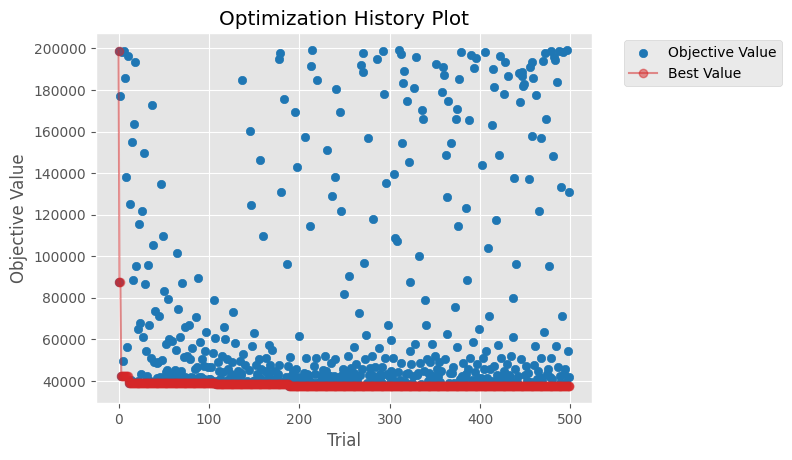

In [21]:
from optuna.visualization.matplotlib import plot_optimization_history
plot_optimization_history(study)